# Importe de datos

Para importar los datos, es necesario utilizar el siguiente comando

In [1]:
import pandas as pd
data = pd.read_csv('RTD.csv')

Si no funciona, descarguen directamente el csv desde Canvas.

Estos datos se ven así:

In [2]:
data

,t,E(t)
0,0.00000,0.000000
1,0.02002,0.011399
2,0.04004,0.000000
3,0.06006,0.031406
4,0.08008,0.029166
...,...,...
995,19.91992,0.000000
996,19.93994,0.014421
997,19.95996,0.000000
998,19.97998,0.003165


Como vemos, corresponde a 1000 datos de tiempo de residencia de trazadores.

# Integrales sobre distribuciones

Es importante siempre verificar que una distribución sea efectivamente una distribución, es decir:
$$
\sum_i^n p(n) = 1
$$
Para datos discretos.
$$
\int_{-\infty}^{\infty} p(x)dx = 1
$$
Para datos continuos.

Para esto, es posible realizar el siguiente procedimiento:

0.9999629497022364


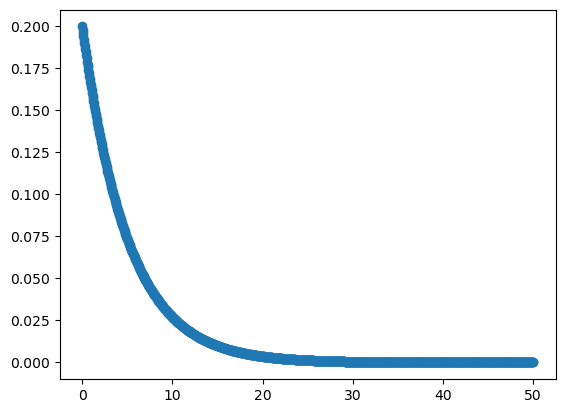

In [3]:
# generamos datos aleatorios 
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt
np.random.seed(0) # para reproducibilidad
def random_data(n):
    return stats.expon.pdf(n, scale = 5)
n = np.linspace(0, 50, 1000)
y = random_data(n)  

# graficamos para ver que tenemos
plt.scatter(n, y)
# ahora calculamos la integral usando la regla del trapecio
integral = np.trapezoid(y, n) 
print(integral) # ¿Se verfica lo que esperamos?

La función `integral = np.trapezoid(y, n)` va a realizar una integración numérica sobre el área definida por los pares (n , y), donde n es el valor del eje X e y el valor del eje y. (Esto puede ser aplicado para otro tipo de funciones ;)).

Para otros tipos de integración útiles pueden ver el siguiente [link](https://docs.scipy.org/doc/scipy/reference/integrate.html#integrating-functions-given-fixed-samples).

# Generación de datos aleatorios

Es posible generar datos (pseudo)aleatorios en python. Para esto utilizaremos el paquete `scipy`.

Para las distribuciones mostradas, considere que la media de sus datos es $\mu$ (`mu`) y la desviación estándar es $\sigma$ (`sigma`). De esta forma, para modelar sus datos con una **probabilidad normal**. Utilice:
- `stats.norm.rvs(loc=mu, scale=sigma, size=1000)` para generar datos aleatorios (1000 en este caso)
- `stats.norm.pdf(x, loc=mu, scale=sigma)` para calcular la probabilidad de x siguiendo una distribución normal.
**Para una probabilidad beta:**

Considere 
$$
a = \left( \frac{1-\mu}{\sigma^2} - \frac{1}{\mu} \right) \mu^2\\
b = a \left(\frac{1}{\mu} - 1 \right)
$$

A partir de estos, puede utilizar:
- `stats.beta.rvs(a = a, b = b, size=1000)` para generar datos aleatorios (1000 en este caso)
- `stats.beta.pdf(x, a = a, b = b)` para calcular la probabilidad de x siguiendo una distribución beta.

**Para una probabilidad uniforme:**

Considere que sus datos van desde [0, 10]. Entonces
A partir de estos, puede utilizar:
- `stats.uniform.rvs(loc = 0, scale = 10, size=1000)` para generar datos aleatorios (1000 en este caso)
- `stats.uniform.pdf(x,loc = 0, scale = 10)` para calcular la probabilidad de x siguiendo una distribución uniforme.

**Para una probabilidad exponencial**

A partir de la media de sus datos. Notar que en este caso esta distribución tiene como soporte (el eje x) [k, inf]
(Donde k es un número arbitrario que depende de sus datos).
- `stats.expon.rvs(loc = k, scale = mu, size=1000)` para generar datos aleatorios (1000 en este caso)
- `stats.expon.pdf(x,loc = k, scale = mu)` para calcular la probabilidad de x siguiendo una distribución exponencial.

**Para una probabilidad Gamma**

Considere que:

$$
a = \left(\frac{\mu}{\sigma}\right)^2\\
\theta = \frac{\mu}{a} =\frac{\sigma^2}{\mu}
$$
Donde $\theta$ se nombrará `theta` en el código.

De esta forma, considerando que sus datos van desde [k, inf]:
- `stats.expon.rvs(a = a, scale = theta, size=1000)` para generar datos aleatorios (1000 en este caso)
- `stats.expon.pdf(x,a = a, loc = k, scale = theta)` para calcular la probabilidad de x siguiendo una distribución gamma.

Ejemplos de uso:

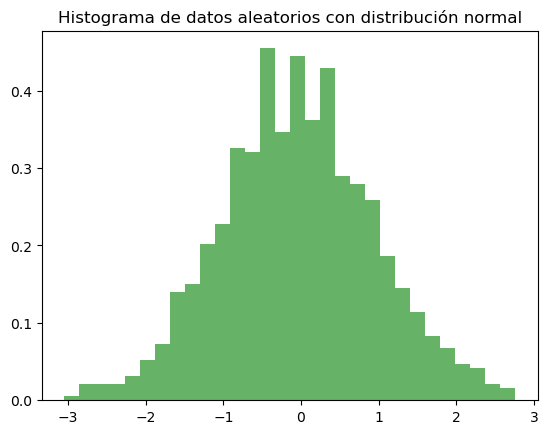

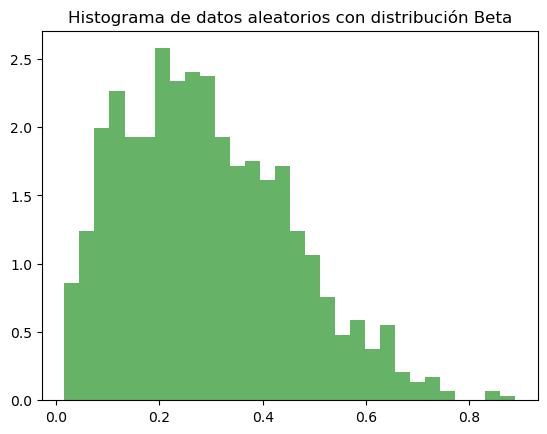

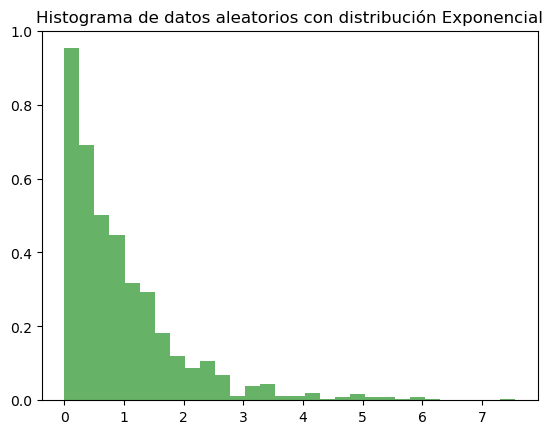

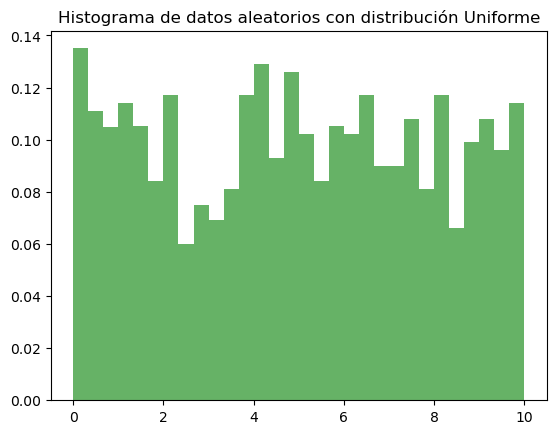

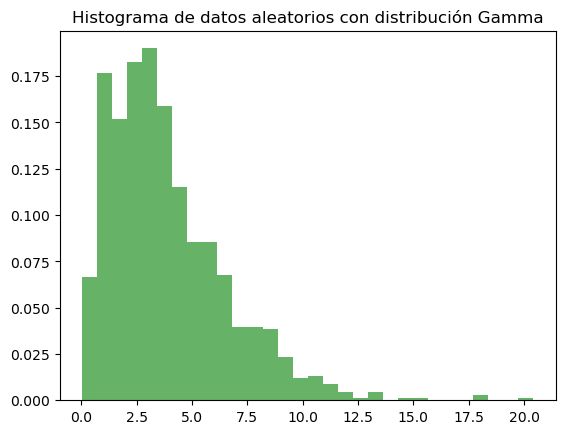

In [4]:
import scipy.stats as stats
# generamos datos aleatorios con distribución normal
datos = stats.norm.rvs(loc=0, scale=1, size=1000)  # media 0, desviación estándar 1, 1000 datos
# graficamos un histograma de los datos generados
plt.hist(datos, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histograma de datos aleatorios con distribución normal')
plt.show()
# generamos datos aleatorios con distribución Beta
datos = stats.beta.rvs(a=2, b=5, size=1000)  # parámetros de forma a=2, b=5, 1000 datos


# graficamos un histograma de los datos generados
plt.hist(datos, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histograma de datos aleatorios con distribución Beta')
plt.show()
# generamos datos aleatorios con distribución Exponencial
datos = stats.expon.rvs(scale=1, size=1000)  # escala = 1
# graficamos un histograma de los datos generados
plt.hist(datos, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histograma de datos aleatorios con distribución Exponencial')
plt.show()

# generamos datos aleatorios con distribución Uniforme
datos = stats.uniform.rvs(loc=0, scale=10, size=1000)  # entre 0 y 10
# graficamos un histograma de los datos generados
plt.hist(datos, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histograma de datos aleatorios con distribución Uniforme')
plt.show()

# generamos datos aleatorios con distribución Gamma 
datos = stats.gamma.rvs(a=2, scale=2, size=1000)  # parámetro de forma a=2, escala=2
# graficamos un histograma de los datos generados
plt.hist(datos, bins=30, density=True, alpha=0.6, color='g')
plt.title('Histograma de datos aleatorios con distribución Gamma')
plt.show()

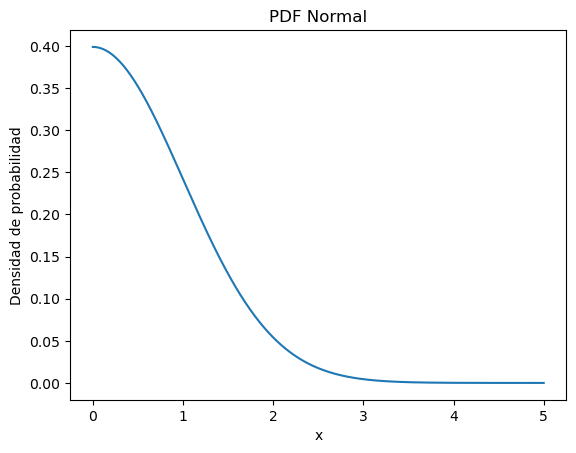

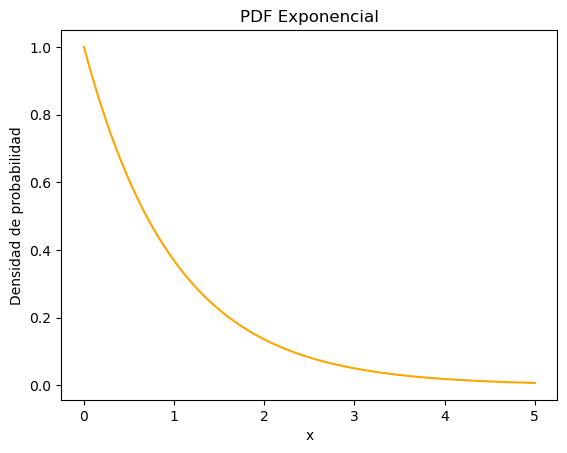

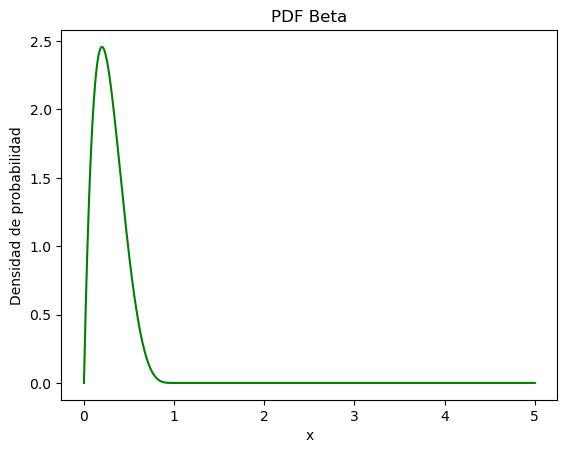

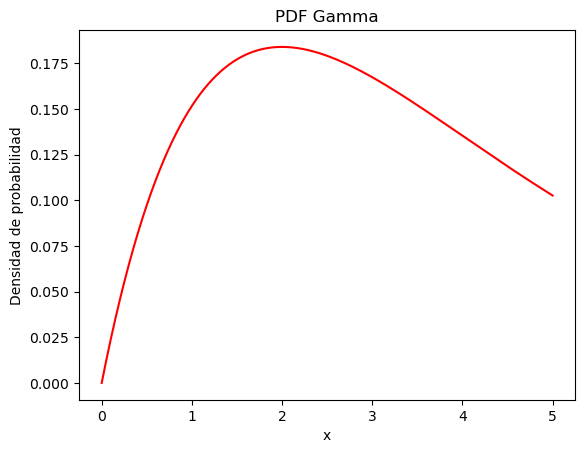

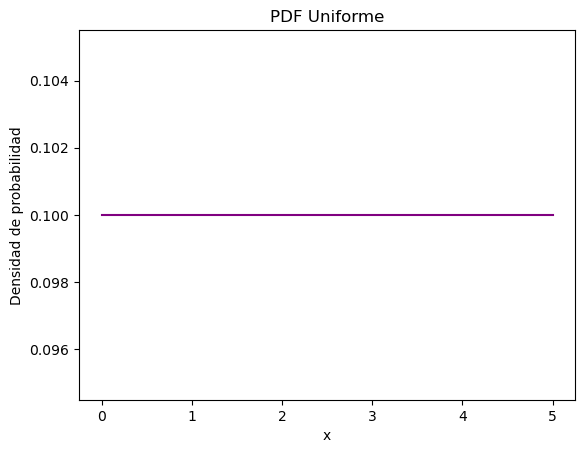

In [5]:
# también se puede generar la probabilidad de ciertos datos
n = np.linspace(0, 5, 1000)
pdf = stats.norm.pdf(n, loc=0, scale=1)  # distribución normal
plt.plot(n, pdf, label='PDF Normal')
plt.title('PDF Normal')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')  
plt.show()
# exponencial
pdf = stats.expon.pdf(n, scale=1)  # distribución exponencial
plt.plot(n, pdf, label='PDF Exponencial', color='orange')
plt.title('PDF Exponencial')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')  
plt.show()
# beta
pdf = stats.beta.pdf(n, a=2, b=5)  # distribución beta
plt.plot(n, pdf, label='PDF Beta', color='green')   
plt.title('PDF Beta')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')  
plt.show()  

# gamma
pdf = stats.gamma.pdf(n, a=2, scale=2)  # distribución gamma
plt.plot(n, pdf, label='PDF Gamma', color='red')
plt.title('PDF Gamma')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')  
plt.show()
# uniforme
pdf = stats.uniform.pdf(n, loc=0, scale=10)  # distribución uniforme
plt.plot(n, pdf, label='PDF Uniforme', color='purple')
plt.title('PDF Uniforme')
plt.xlabel('x')
plt.ylabel('Densidad de probabilidad')  
plt.show()

En este caso, tengan precaoción cuál es la forma en la cuál se parametrizan las distribuciones. Existen diferentes formas en las que se pueden generar. Un caso típico es que la distribución Normal puede ser parametrizada por la media y la desviación estándar, o la media y la varianza. Para saber más sobre esto, pueden dirigirse a los siguientes links
- Parámetros normal: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.norm.html
- Parámetros exponencial: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.expon.html
- Parámetros Gamma: https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.gamma.html
